In [16]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [17]:
# Load the datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [18]:
# Merge datasets
data = transactions.merge(customers, on='CustomerID', how='inner')
data = data.merge(products, on='ProductID', how='inner')

In [19]:
# Create new features for clustering
customer_features = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',  
    'Quantity': 'mean',  
    'ProductID': 'nunique'  
}).reset_index()


In [20]:
# Rename columns for clarity
customer_features.columns = ['CustomerID', 'TotalSpending', 'AvgQuantity', 'UniqueProducts']

In [21]:
#  Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['TotalSpending', 'AvgQuantity', 'UniqueProducts']])

In [22]:
#WCSS and K-Means Clustering
wcss = []
k_values = range(1, 11)

In [23]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

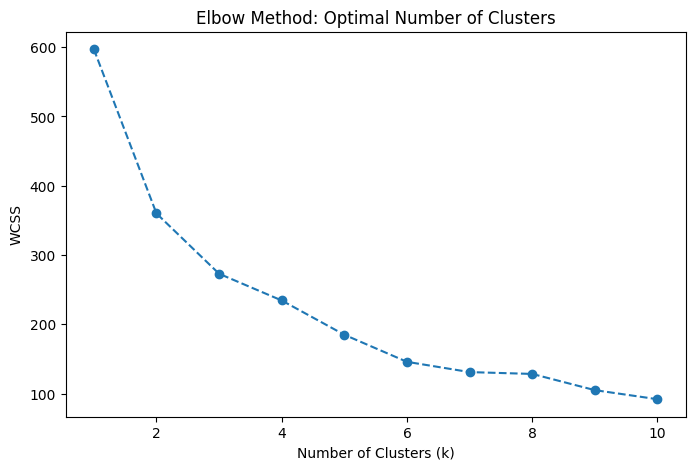

In [24]:
# Plotting the WCSS (Elbow Method)
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title("Elbow Method: Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()

In [25]:
# Based on the Elbow Curve
optimal_k = 4  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

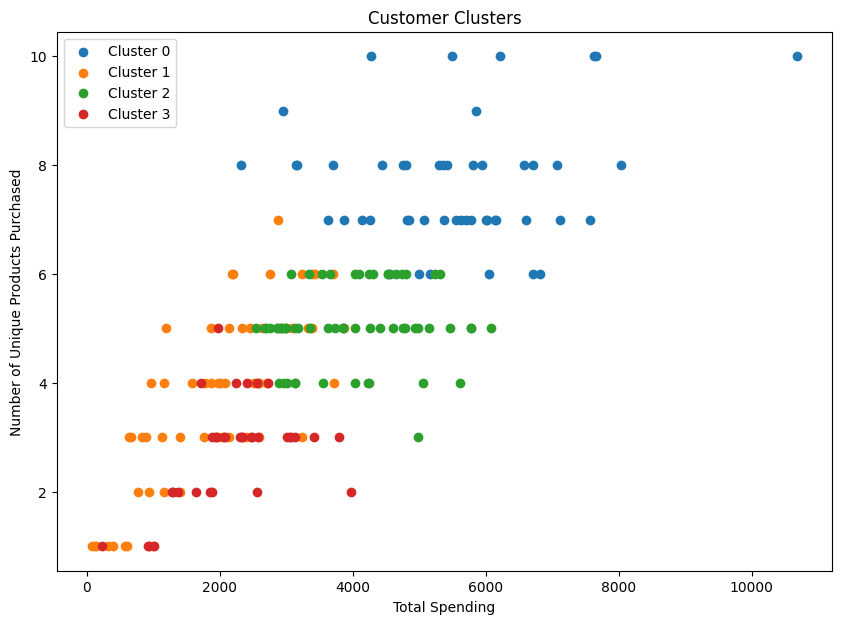

In [26]:
# Visualization of Clusters
plt.figure(figsize=(10, 7))
for cluster in range(optimal_k):
    cluster_data = customer_features[customer_features['Cluster'] == cluster]
    plt.scatter(
        cluster_data['TotalSpending'],
        cluster_data['UniqueProducts'],
        label=f"Cluster {cluster}"
    )
plt.title("Customer Clusters")
plt.xlabel("Total Spending")
plt.ylabel("Number of Unique Products Purchased")
plt.legend()
plt.show()

In [27]:
# Print sample data with assigned clusters
print(customer_features.head())


  CustomerID  TotalSpending  AvgQuantity  UniqueProducts  Cluster
0      C0001        3354.52     2.400000               5        2
1      C0002        1862.74     2.500000               4        1
2      C0003        2725.38     3.500000               4        3
3      C0004        5354.88     2.875000               8        0
4      C0005        2034.24     2.333333               3        1
